In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

print('Physical Devices:')
for dev in tf.config.list_physical_devices():
    print(dev)

2024-04-25 15:11:30.655787: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 15:11:30.749987: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 15:11:30.750017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 15:11:30.756511: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 15:11:30.794755: I tensorflow/core/platform/cpu_feature_guar

Physical Devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-04-25 15:11:32.913194: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 15:11:33.057581: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 15:11:33.057630: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
from zscomm.agent import Agent
from zscomm.comm_channel import CommChannel
from zscomm.synth_teacher import SyntheticTeacher
from zscomm.data import *
from zscomm.play_game import *
from zscomm.loss import *
from zscomm.experiment import Experiment
from zscomm.plot_game import plot_game
from zscomm.analysis import *

In [3]:
NUM_CLASSES = 3
CHANNEL_SIZE = 5
BATCH_SIZE = 32

TRAIN_DATA, TEST_DATA = get_simple_card_data(num_classes=NUM_CLASSES)


def generate_train_batch():
    return generate_batch(TRAIN_DATA,
                          batch_size=BATCH_SIZE, 
                          num_classes=NUM_CLASSES)


def generate_test_batch():
    return generate_batch(TEST_DATA,
                          batch_size=BATCH_SIZE, 
                          num_classes=NUM_CLASSES)

In [4]:
def create_self_play_experiment(p_mutate=0.3, epochs=40, 
                                loss_fn=complete_loss_fn):
    
    agent = Agent(CHANNEL_SIZE, NUM_CLASSES)

    play_params =  {
        'channel_size': CHANNEL_SIZE,
        'p_mutate': p_mutate
    }

    return Experiment(
        generate_train_batch, generate_test_batch,
        play_params=play_params, 
        student=agent,
        teacher=agent,
        loss_fn=loss_fn,
        max_epochs=epochs,
        name='msg_mut_example'
    )

In [5]:
msg_mut_exp = create_self_play_experiment()

2024-04-25 15:11:34.402501: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 15:11:34.402623: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 15:11:34.402653: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 15:11:34.666236: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 15:11:34.666443: I external/local_xla/xla/stream_executor

In [6]:
msg_mut_exp.run()

Running msg_mut_example...
Run config:
 {'name': 'msg_mut_example', 'max_epochs': 40, 'steps_per_epoch': 50, 'epochs_optimised': 40, 'play_params': {'channel_size': 5, 'p_mutate': 0.3}, 'test_freq': 5, 'test_steps': 25, 'optimiser_config': {'name': 'RMSprop', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': 100, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.009999999776482582, 'rho': 0.9, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}, 'optimise_agents_separately': False, 'loss_fn': 'complete_loss_fn'}
Epoch 0, Time Taken (mm:ss): 0:18, Mean Loss: 3.875
Test Loss: 4.246, Ground Truth F1-Score: 0.324, Student Error: 1.104, Teacher Error: 0.789, Protocol Diversity: 0.478, Protocol Entropy: 0.81,
Epoch 1, Time Taken (mm:ss): 0:15, Mean Loss: 3.737
Epoch 2, Time Taken (mm:ss): 0:16, Mean Loss: 3.823
Epoch 3, Time Taken (mm:ss): 0:15, Mean Loss: 3.815
Epoch 4,

In [7]:
games_played, _ = msg_mut_exp.run_tests()

In [11]:
inputs.numpy().shape

(4, 32, 2)

/home/dylan/projects/zero-shot-comm/zscomm/plot_game.py:77: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x='x', y='y', hue='type',
/home/dylan/projects/zero-shot-comm/zscomm/plot_game.py:77: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x='x', y='y', hue='type',
/home/dylan/projects/zero-shot-comm/zscomm/plot_game.py:77: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x='x', y='y', hue='type',
/home/dylan/projects/zero-shot-comm/zscomm/plot_game.py:77: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x='x', y='y', hue='type',
/home/dylan/projects/zero-shot-comm/zscomm/plot_game.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

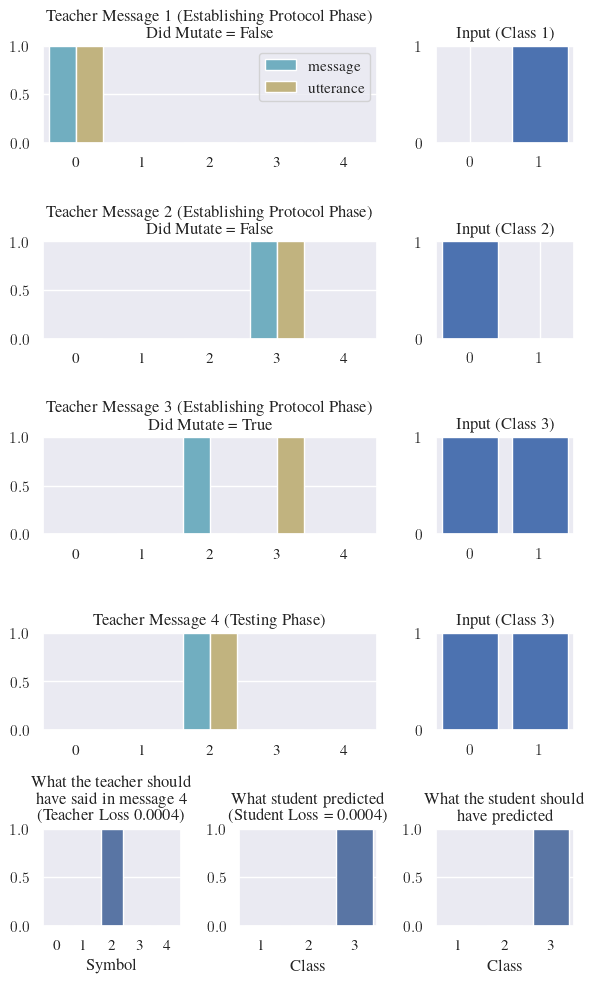

In [12]:
from reproducible_figures import set_plotting_style

for i in range(1):
    inputs, targets, outputs = games_played[5+i]
    set_plotting_style(font_scale=1)
    plot_game(inputs, outputs, targets, select_batch=0, show=False)
    plt.savefig('figures/msg_mut_example_game.pdf', dpi=300)